# LFPCA on EEG_ECoG data as well as Visual Grating

In [1]:
import sys
sys.path.append('/Users/Lauren/Voytek/spectralCV')

In [2]:
%matplotlib inline

# imports
from scv_funcs import access_nt as asc
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import matplotlib.pyplot as plt
import h5py

import neurodsp as ndsp
from fooof import FOOOFGroup
from scv_funcs import lfpca

#load data from h5 
h5_file = '../Voytek/scv.h5'

C:\Users\Lauren\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### EEG ECoG

Data info EEG-ECoG Task

    *Task design
    The blindfolded monkey was seated in a primate chair and tied hand.

#### ECoG

In [ ]:
data_path ="/Users/Lauren/Data/NeuroTycho/EEGECoG/20110607S1_EEGECoG_Su_Oosugi-Naoya+Nagasaka-Yasuo+Hasegawa+Naomi_ECoG128-EEG18_mat/ECoG01.mat"

In [ ]:
import h5py
with h5py.File(data_path, 'r') as f:
    dset = f['WaveData']
    data = []
    data.append(dset[:][:])
    data = data[0]

In [ ]:
# example of using LFPCA
fs = 1000
analysis_param = {'nperseg': 1000,
                 'noverlap': 0,
                 'spg_outlierpct': 2.,
                 'max_freq':200}

# initialize object with data and parameters
ecog_lfpca = lfpca.LFPCA(analysis_param)
ecog_lfpca.populate_ts_data(data[:,:], fs) #this takes too long to run on my comp

# compute all spectral attributes
ecog_lfpca.compute_all_spectral()

In [ ]:
# compute KS-test fit against null exponential hypothesis
ecog_lfpca.compute_KS_expfit() # this takes a few minutes

In [ ]:
plot_chan = 2

plt.figure(figsize=(15,4))
ecog_lfpca.plot_spectral(plot_mean=False, plot_chan=plot_chan)

plot_freqs = [7,10,25]
plt.figure(figsize=(15,4))
for i,f in enumerate(plot_freqs):
    plt.subplot(1,3,i+1)
    ecog_lfpca.plot_expfit(chan=plot_chan, freq_ind=f)

plt.tight_layout()

#### EEG

In [3]:
data_path ="/Users/Lauren/Data/NeuroTycho/EEGECoG/20110607S1_EEGECoG_Su_Oosugi-Naoya+Nagasaka-Yasuo+Hasegawa+Naomi_ECoG128-EEG18_mat/EEG01.mat"

In [4]:
matfile = io.loadmat(data_path, squeeze_me=True)
data = matfile['EEG2']

In [5]:
# example of using LFPCA
fs = 1000
analysis_param = {'nperseg': 1000,
                 'noverlap': 0,
                 'spg_outlierpct': 2.,
                 'max_freq':200}

# initialize object with data and parameters
eeg_lfpca = lfpca.LFPCA(analysis_param)
eeg_lfpca.populate_ts_data(data, fs)

# compute all spectral attributes
eeg_lfpca.compute_all_spectral()

In [6]:
# compute KS-test fit against null exponential hypothesis
eeg_lfpca.compute_KS_expfit() # this takes a few minutes

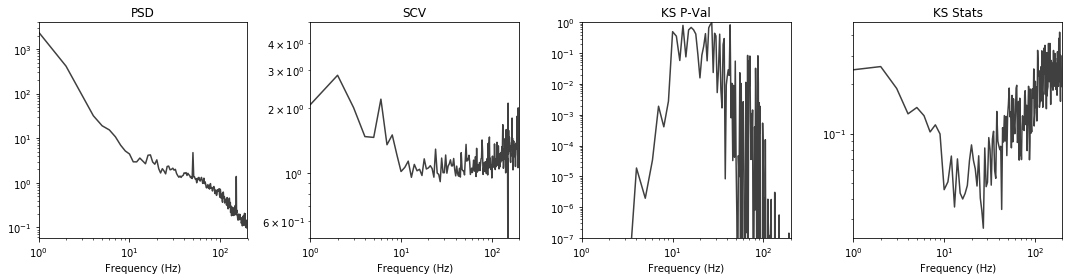

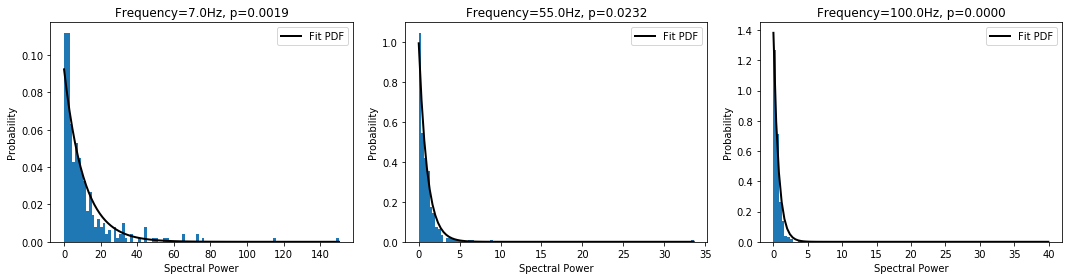

In [7]:
plot_chan = 2

plt.figure(figsize=(15,4))
eeg_lfpca.plot_spectral(plot_mean=False, plot_chan=plot_chan)

plot_freqs = [7,55,100]
plt.figure(figsize=(15,4))
for i,f in enumerate(plot_freqs):
    plt.subplot(1,3,i+1)
    eeg_lfpca.plot_expfit(chan=plot_chan, freq_ind=f)

plt.tight_layout()

## Visual Grating

In [8]:
data_path = "/Users/Lauren/Data/NeuroTycho/VisualGrating/20100723S1_VGT_K2_KazuhitoTakenaka-ToruYanagawa_mat_ECoG128-Event3/"

In [13]:
session = 0
chan = np.arange(1,129).tolist()
# chan = [1]
data = asc.get_ECoG(data_path, session, chan)

In [14]:
# example of using LFPCA
fs = 1000
analysis_param = {'nperseg': 1000,
                 'noverlap': 0,
                 'spg_outlierpct': 2.,
                 'max_freq':200}

# initialize object with data and parameters
vg_lfpca = lfpca.LFPCA(analysis_param)
vg_lfpca.populate_ts_data(data, fs)

# compute all spectral attributes
vg_lfpca.compute_all_spectral()

In [15]:
# compute KS-test fit against null exponential hypothesis
vg_lfpca.compute_KS_expfit() # this takes a few minutes

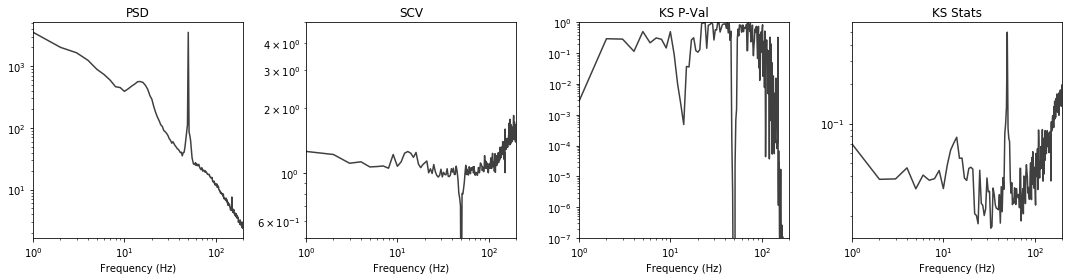

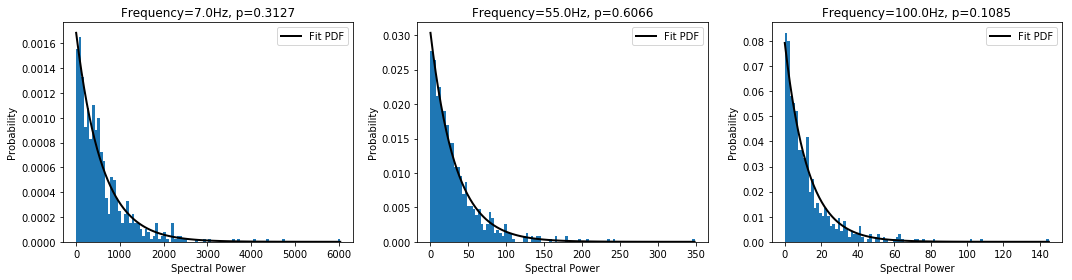

In [16]:
plot_chan = 2

plt.figure(figsize=(15,4))
vg_lfpca.plot_spectral(plot_mean=False, plot_chan=plot_chan)

plot_freqs = [7,55,100]
plt.figure(figsize=(15,4))
for i,f in enumerate(plot_freqs):
    plt.subplot(1,3,i+1)
    vg_lfpca.plot_expfit(chan=plot_chan, freq_ind=f)

plt.tight_layout()